In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import seaborn as sns

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df=pd.read_csv("Data_Combined_Imputed.csv", sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse)

In [2]:
df.head()

,Yield on U.S. 10 Year Government Bond - %,S&P 500,NASDAQ 100,Bloomberg Dollar Index,Gold Price (Oz.) - USD,M2 Money Supply - USD Trillions
Date,,,,,,
2015-01-02,2.1105,2058.20,4230.24,1141.02,1188.39,12.0996
2015-01-05,2.0320,2020.58,4160.96,1143.40,1204.86,12.0996
2015-01-06,1.9402,2002.61,4110.83,1143.01,1218.58,12.0996
2015-01-07,1.9677,2025.90,4160.00,1145.62,1211.41,12.0996
2015-01-08,2.0179,2062.14,4240.55,1147.54,1208.79,12.0996


In [3]:
df_log = np.log(df)
df_log.head()

,Yield on U.S. 10 Year Government Bond - %,S&P 500,NASDAQ 100,Bloomberg Dollar Index,Gold Price (Oz.) - USD,M2 Money Supply - USD Trillions
Date,,,,,,
2015-01-02,0.746925,7.629587,8.350014,7.039678,7.080355,2.493172
2015-01-05,0.709021,7.611140,8.333501,7.041762,7.094119,2.493172
2015-01-06,0.662791,7.602207,8.321380,7.041420,7.105442,2.493172
2015-01-07,0.676865,7.613769,8.333270,7.043701,7.099540,2.493172
2015-01-08,0.702057,7.631500,8.352448,7.045376,7.097375,2.493172


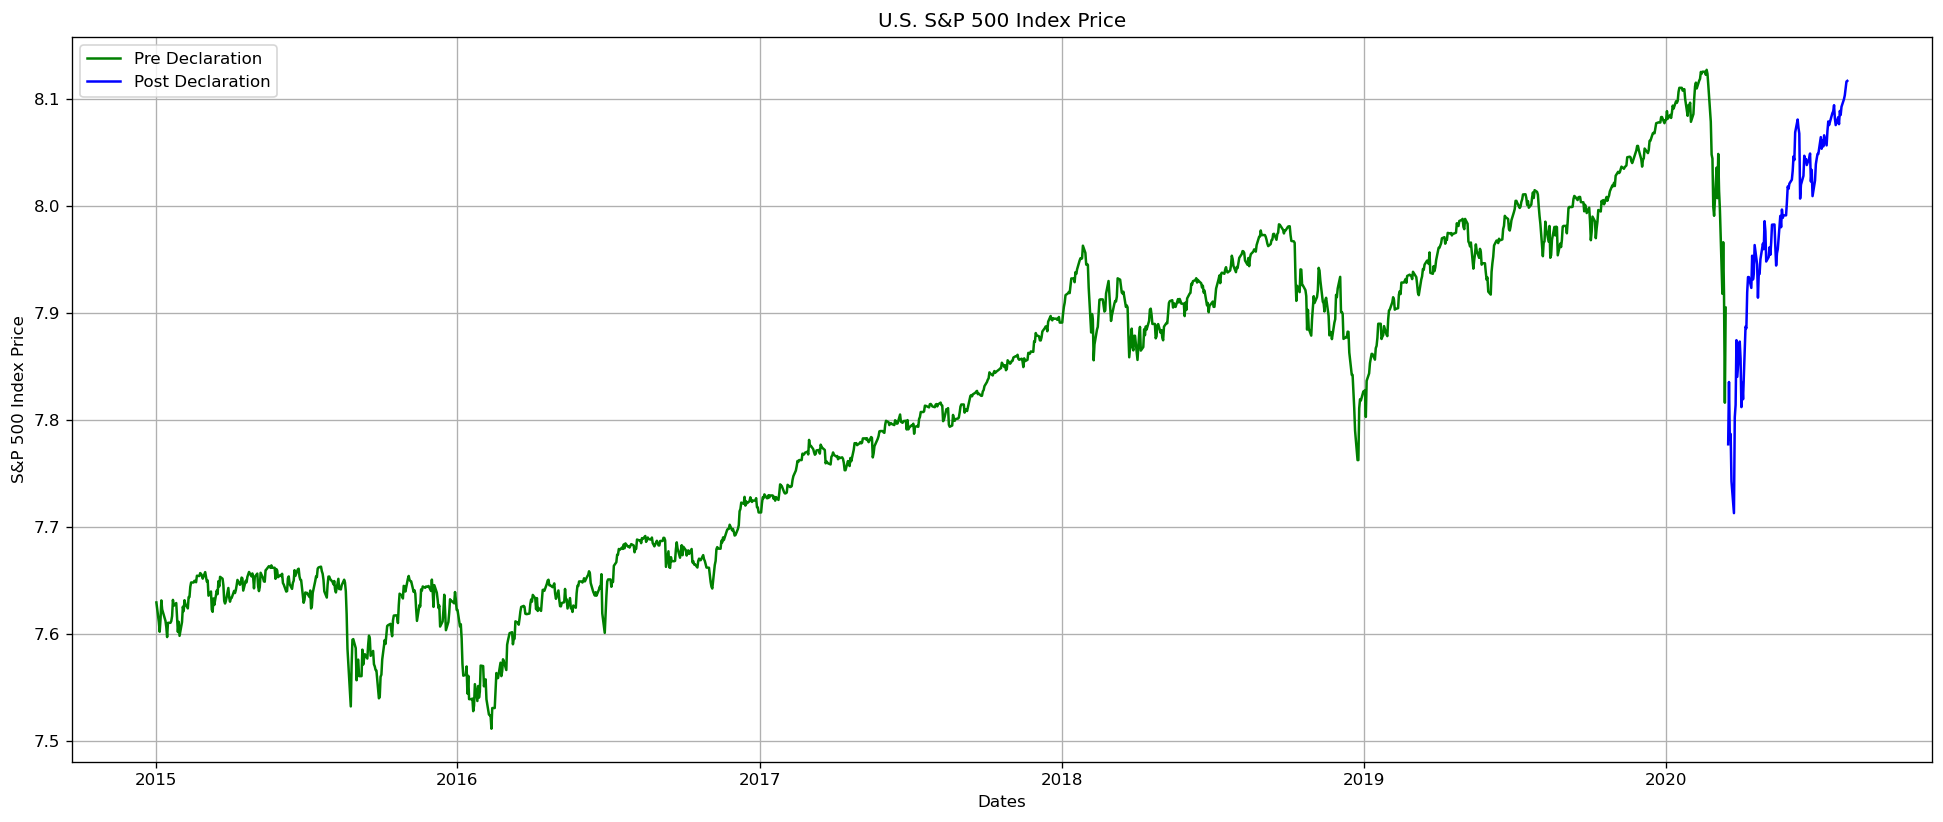

In [4]:
#split data into train and training set
train_data, test_data = df_log['2015-01-02':'2020-03-13'], df_log['2020-03-14':'2020-08-07']
#train_data.tail()
#test_data.head()
plt.figure(figsize=(20,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('S&P 500 Index Price')
plt.title('U.S. S&P 500 Index Price')
plt.plot(train_data["S&P 500"], 'green', label='Pre Declaration')
plt.plot(test_data["S&P 500"], 'blue', label='Post Declaration')
plt.legend()

In [5]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(train_data["S&P 500"], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train_data["S&P 500"], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


In [6]:
auto = pm.auto_arima(train_data["S&P 500"], d=n_diffs, seasonal=True, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8699.045, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8671.699, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8678.591, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8679.613, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8673.121, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8689.770, Time=1.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8679.585, Time=0.90 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-8698.979, Time=1.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8693.587, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8675.067, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8688.812, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-8689.018, Time=0.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-8696.283, Time=2.26 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-8700.314, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0

In [7]:
print(auto.order)

(2, 1, 2)


In [8]:
y_test = []
y_test = test_data["S&P 500"].tolist()

In [9]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step_ex(exog):
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True, exogenous=exog)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step_ex(None)
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)
    
print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 0.0007067953463990467
SMAPE: 0.21503354690512144


In [10]:
conf = pd.DataFrame(confidence_intervals, columns=["Lower", "Upper"])

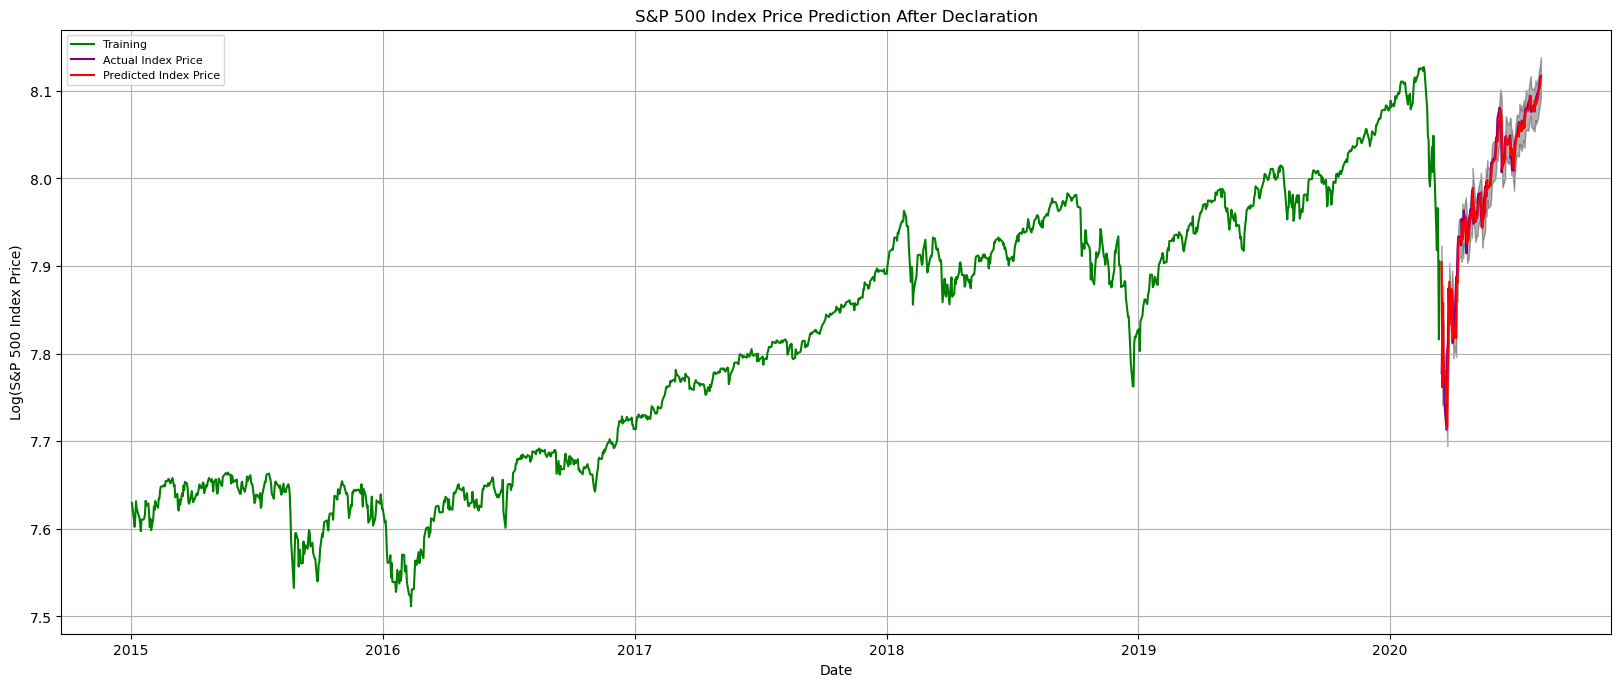

In [11]:
# make series for plotting purpose
fc_series = pd.Series(forecasts, index=test_data["S&P 500"].index)
lower_series = pd.Series(conf["Lower"].tolist(), index=test_data["S&P 500"].index)
upper_series = pd.Series(conf["Upper"].tolist(), index=test_data["S&P 500"].index)

plt.figure(figsize=(20,8), dpi=100)
plt.grid(True)
plt.plot(train_data["S&P 500"], label='Training', color='green')
plt.plot(test_data["S&P 500"], color = 'purple', label='Actual Index Price')
plt.plot(fc_series, color = 'red',label='Predicted Index Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.30)
plt.title('S&P 500 Index Price Prediction After Declaration')
plt.xlabel('Date')
plt.ylabel('Log(S&P 500 Index Price)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [12]:
# report performance
mse = mean_squared_error(test_data["S&P 500"], fc_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data["S&P 500"], fc_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data["S&P 500"], fc_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data["S&P 500"])/np.abs(test_data["S&P 500"]))
print('MAPE: '+str(mape))

MSE: 0.0007067953463990467
MAE: 0.0170286662777343
RMSE: 0.026585622926669345
MAPE: 0.0162237721702698


In [13]:
auto = pm.auto_arima(train_data["S&P 500"], exogenous=train_data[["NASDAQ 100","Bloomberg Dollar Index","Yield on U.S. 10 Year Government Bond - %","Gold Price (Oz.) - USD","M2 Money Supply - USD Trillions"]], d=n_diffs, seasonal=True, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11801.587, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11809.262, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11808.185, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11808.183, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11810.463, Time=1.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11806.177, Time=0.95 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.359 seconds


In [14]:
print(auto.order)

(0, 1, 0)


In [15]:
y_test = []
y_test = test_data["S&P 500"].tolist()
exogen_data = test_data[["NASDAQ 100","Bloomberg Dollar Index","Yield on U.S. 10 Year Government Bond - %","Gold Price (Oz.) - USD","M2 Money Supply - USD Trillions"]]
exogen_data = exogen_data.values.tolist()
#[exogen_data[0]]

In [16]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step_ex(exog):
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True, exogenous=exog)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob, item in zip(y_test, exogen_data):
    fc, conf = forecast_one_step_ex([item])
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob, exogenous=[item])
    
print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 7.410991867410614e-05
SMAPE: 0.08010795730102299


In [17]:
conf = pd.DataFrame(confidence_intervals, columns=["Lower", "Upper"])

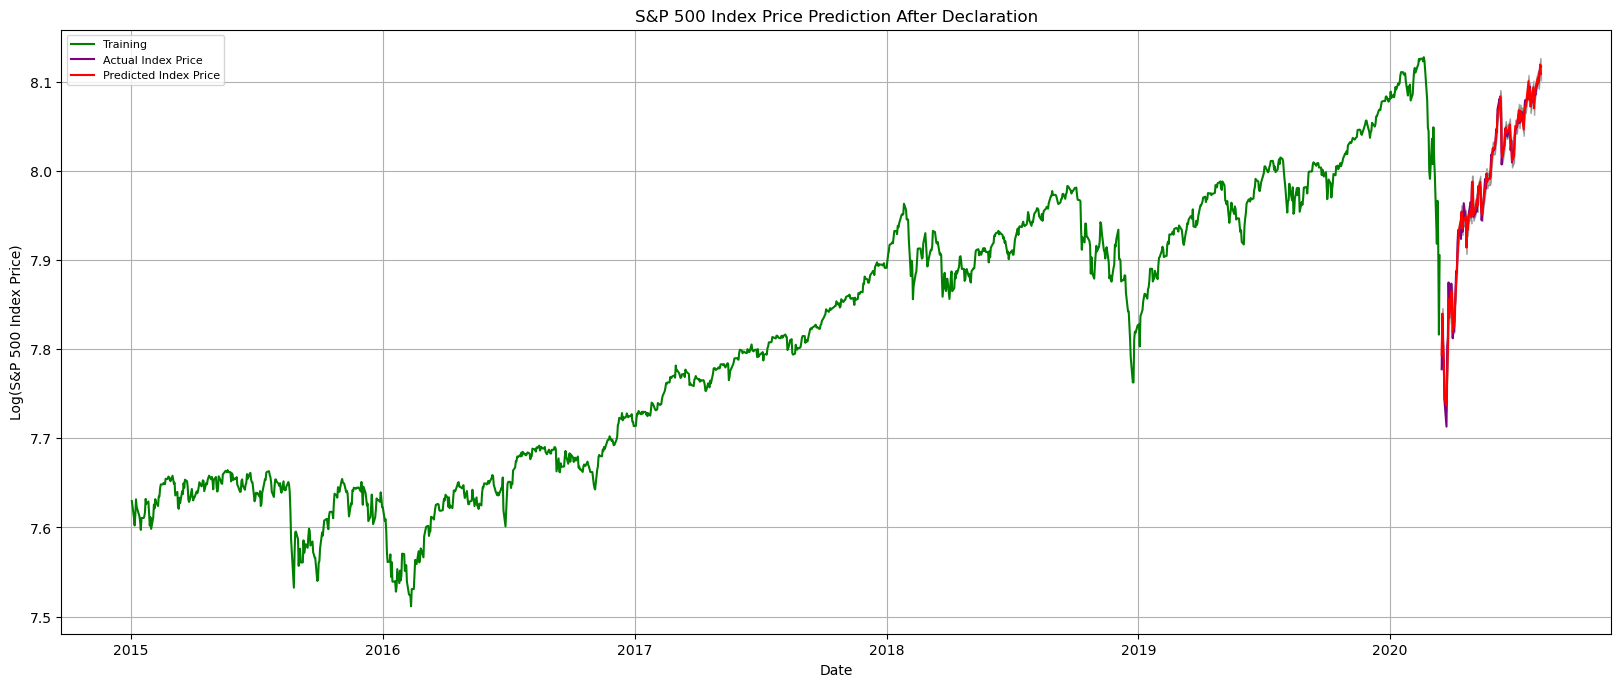

In [18]:
# make series for plotting purpose
fc_series = pd.Series(forecasts, index=test_data["S&P 500"].index)
lower_series = pd.Series(conf["Lower"].tolist(), index=test_data["S&P 500"].index)
upper_series = pd.Series(conf["Upper"].tolist(), index=test_data["S&P 500"].index)

plt.figure(figsize=(20,8), dpi=100)
plt.grid(True)
plt.plot(train_data["S&P 500"], label='Training', color='green')
plt.plot(test_data["S&P 500"], color = 'purple', label='Actual Index Price')
plt.plot(fc_series, color = 'red',label='Predicted Index Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.30)
plt.title('S&P 500 Index Price Prediction After Declaration')
plt.xlabel('Date')
plt.ylabel('Log(S&P 500 Index Price)')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('SP 500 Pre Prediction.png')
plt.show()

In [19]:
# report performance
mse = mean_squared_error(test_data["S&P 500"], fc_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data["S&P 500"], fc_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data["S&P 500"], fc_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data["S&P 500"])/np.abs(test_data["S&P 500"]))
print('MAPE: '+str(mape))

MSE: 7.410991867410614e-05
MAE: 0.006371312320027275
RMSE: 0.008608711789466886
MAPE: 0.015370237478674994


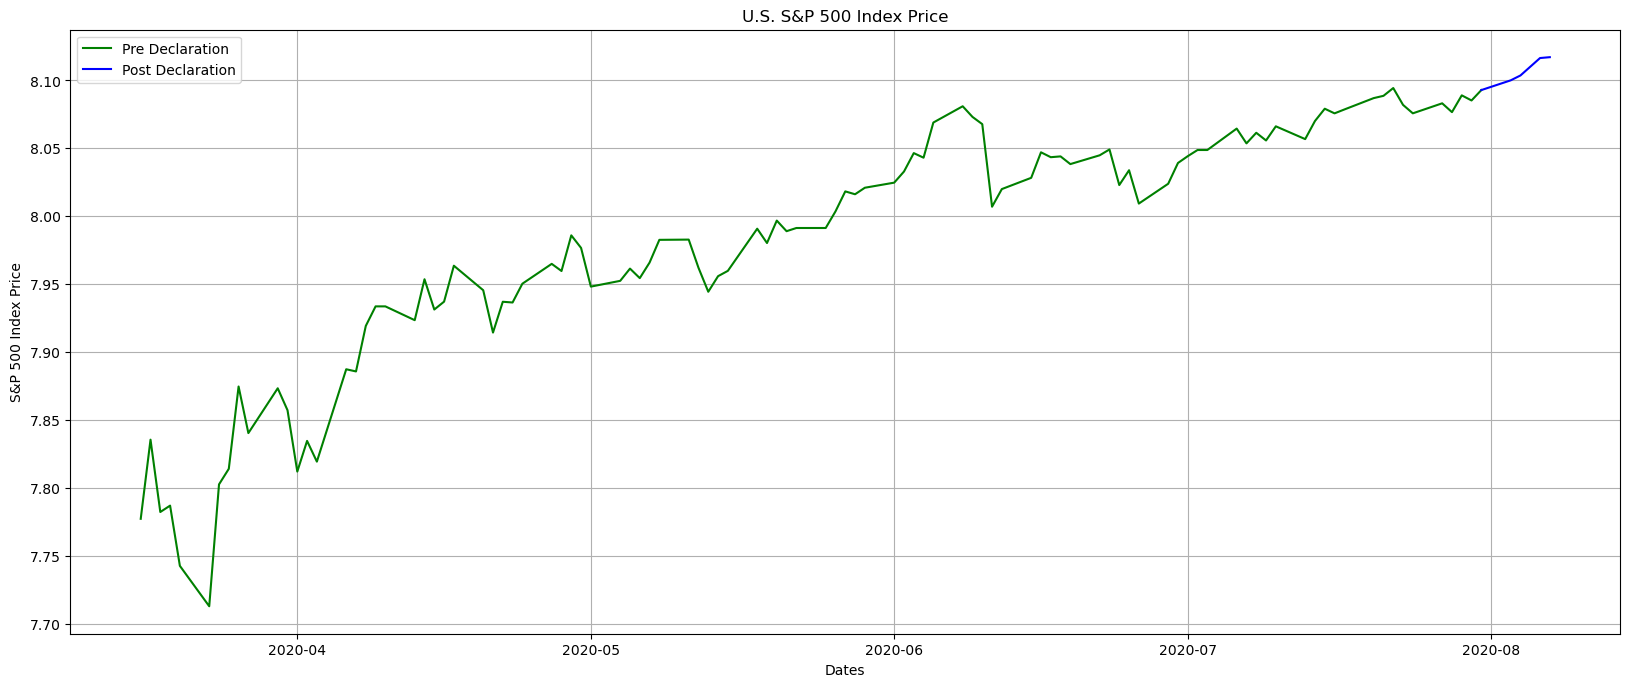

In [20]:
#split data into train and training set
train_data, test_data = df_log['2020-03-14':'2020-07-31'], df_log['2020-07-31':'2020-08-07']
# train_data.tail()
# test_data.tail()
plt.figure(figsize=(20,8), dpi=100)
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('S&P 500 Index Price')
plt.title('U.S. S&P 500 Index Price')
plt.plot(train_data["S&P 500"], 'green', label='Pre Declaration')
plt.plot(test_data["S&P 500"], 'blue', label='Post Declaration')
plt.legend()

In [21]:
auto = pm.auto_arima(train_data["S&P 500"], exogenous=train_data[["NASDAQ 100","Bloomberg Dollar Index","Yield on U.S. 10 Year Government Bond - %","Gold Price (Oz.) - USD","M2 Money Supply - USD Trillions"]], d=n_diffs, seasonal=True, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-681.161, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-687.070, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-685.277, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-685.368, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-689.017, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-683.296, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.029 seconds


In [22]:
print(auto.order)

(0, 1, 0)


In [23]:
y_test = []
y_test = test_data["S&P 500"].tolist()
exogen_data = test_data[["NASDAQ 100","Bloomberg Dollar Index","Yield on U.S. 10 Year Government Bond - %","Gold Price (Oz.) - USD","M2 Money Supply - USD Trillions"]]
exogen_data = exogen_data.values.tolist()
#[exogen_data[0]]

In [24]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step_ex(exog):
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True, exogenous=exog)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob, item in zip(y_test, exogen_data):
    fc, conf = forecast_one_step_ex([item])
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob, exogenous=[item])
    
print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 2.5055167839901475e-05
SMAPE: 0.044299320875305435


In [25]:
conf = pd.DataFrame(confidence_intervals, columns=["Lower", "Upper"])

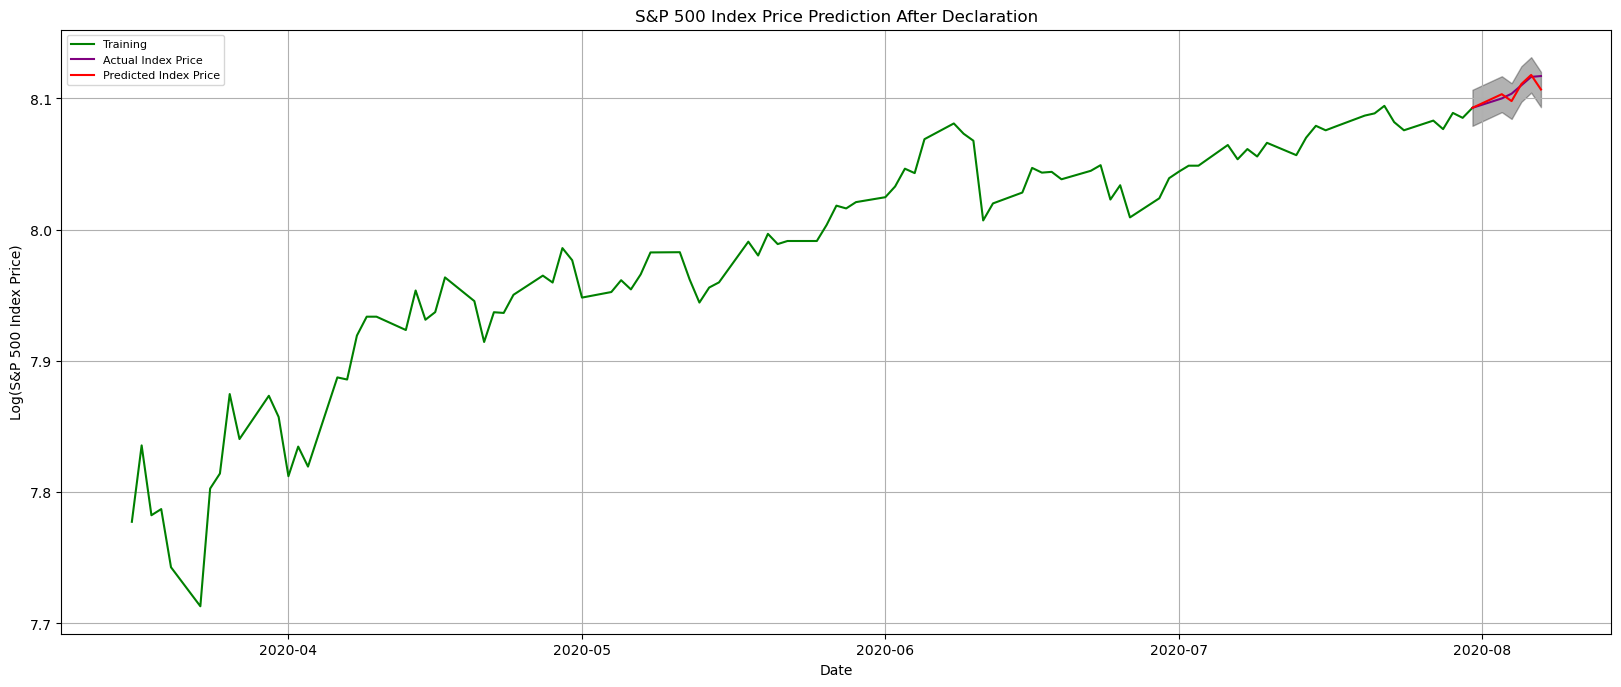

In [26]:
# make series for plotting purpose
fc_series = pd.Series(forecasts, index=test_data["S&P 500"].index)
lower_series = pd.Series(conf["Lower"].tolist(), index=test_data["S&P 500"].index)
upper_series = pd.Series(conf["Upper"].tolist(), index=test_data["S&P 500"].index)

plt.figure(figsize=(20,8), dpi=100)
plt.grid(True)
plt.plot(train_data["S&P 500"], label='Training', color='green')
plt.plot(test_data["S&P 500"], color = 'purple', label='Actual Index Price')
plt.plot(fc_series, color = 'red',label='Predicted Index Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.30)
plt.title('S&P 500 Index Price Prediction After Declaration')
plt.xlabel('Date')
plt.ylabel('Log(S&P 500 Index Price)')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('SP 500 Post Prediction.png')
plt.show()

In [27]:
# report performance
mse = mean_squared_error(test_data["S&P 500"], fc_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data["S&P 500"], fc_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data["S&P 500"], fc_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data["S&P 500"])/np.abs(test_data["S&P 500"]))
print('MAPE: '+str(mape))

MSE: 2.5055167839901475e-05
MAE: 0.0035917074811028606
RMSE: 0.00500551374385302
MAPE: 0.0009672126583569786


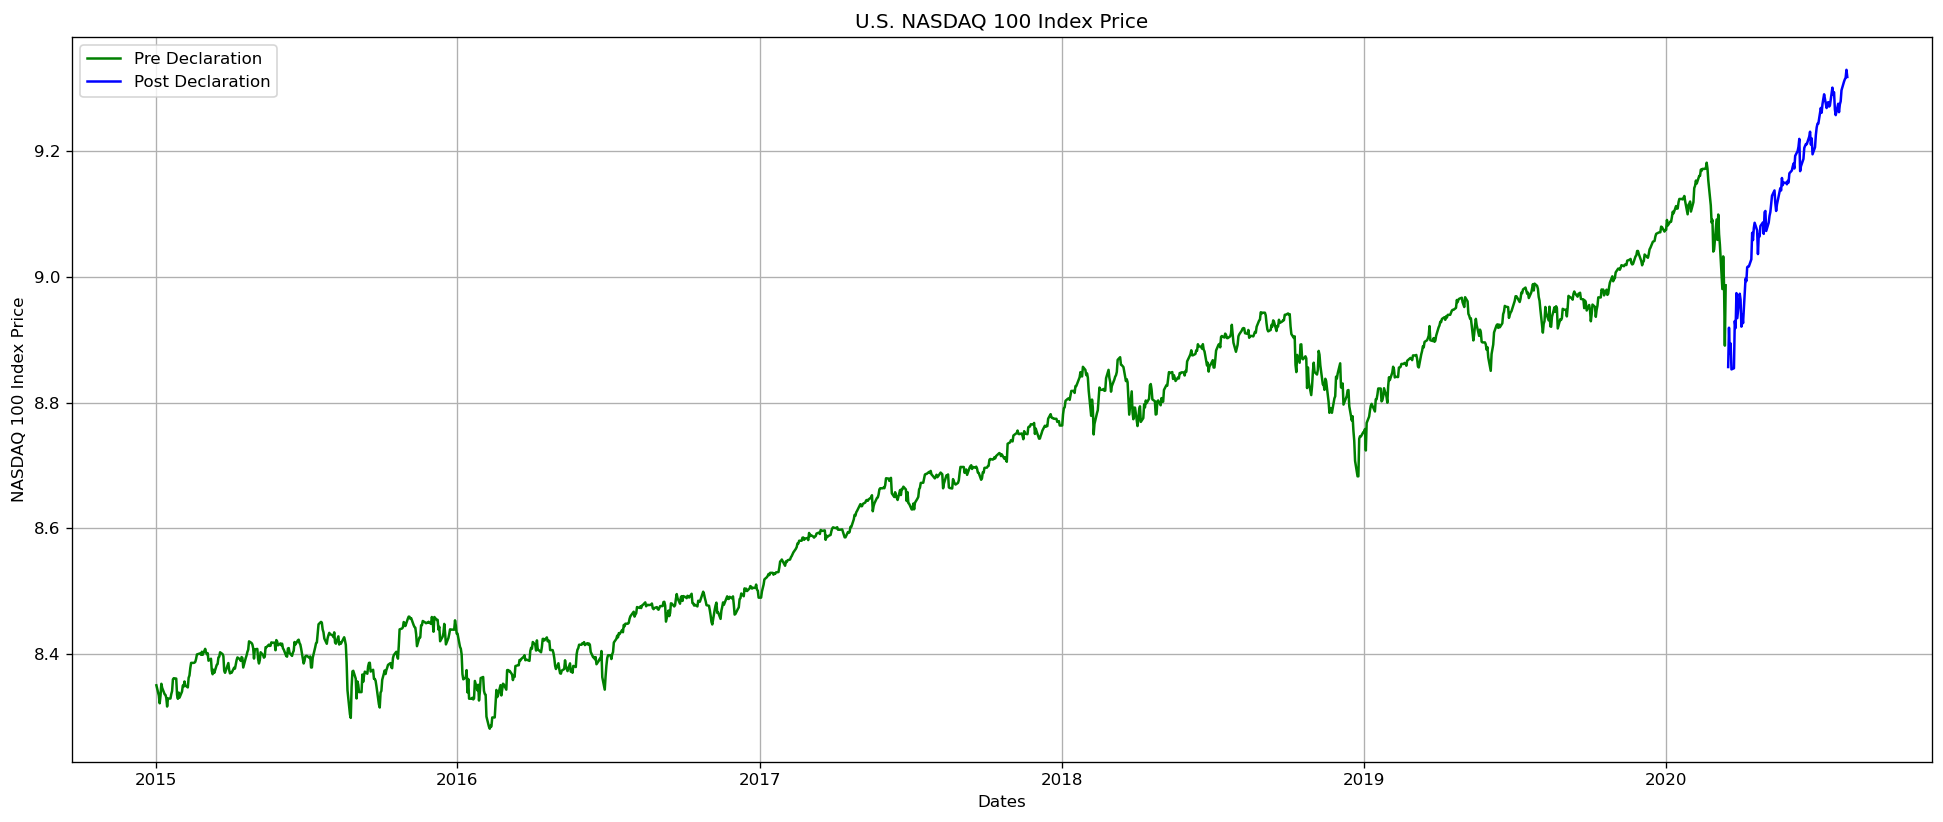

In [28]:
#split data into train and training set
train_data, test_data = df_log['2015-01-02':'2020-03-13'], df_log['2020-03-14':'2020-08-07']
#train_data.tail()
#test_data.head()
plt.figure(figsize=(20,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ 100 Index Price')
plt.title('U.S. NASDAQ 100 Index Price')
plt.plot(train_data["NASDAQ 100"], 'green', label='Pre Declaration')
plt.plot(test_data["NASDAQ 100"], 'blue', label='Post Declaration')
plt.legend()

In [29]:
auto = pm.auto_arima(train_data["NASDAQ 100"], exogenous=train_data[["S&P 500","Bloomberg Dollar Index","Yield on U.S. 10 Year Government Bond - %","Gold Price (Oz.) - USD","M2 Money Supply - USD Trillions"]], d=n_diffs, seasonal=True, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11167.557, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11175.563, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11173.593, Time=0.74 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11173.595, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11175.578, Time=0.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11171.600, Time=0.75 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.714 seconds


In [30]:
print(auto.order)

(0, 1, 0)


In [31]:
y_test = []
y_test = test_data["NASDAQ 100"].tolist()
exogen_data = test_data[["S&P 500","Bloomberg Dollar Index","Yield on U.S. 10 Year Government Bond - %","Gold Price (Oz.) - USD","M2 Money Supply - USD Trillions"]]
exogen_data = exogen_data.values.tolist()

In [32]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step_ex(exog):
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True, exogenous=exog)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob, item in zip(y_test, exogen_data):
    fc, conf = forecast_one_step_ex([item])
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob, exogenous=[item])
    
print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 8.877413124419252e-05
SMAPE: 0.07887519760604239


In [33]:
conf = pd.DataFrame(confidence_intervals, columns=["Lower", "Upper"])

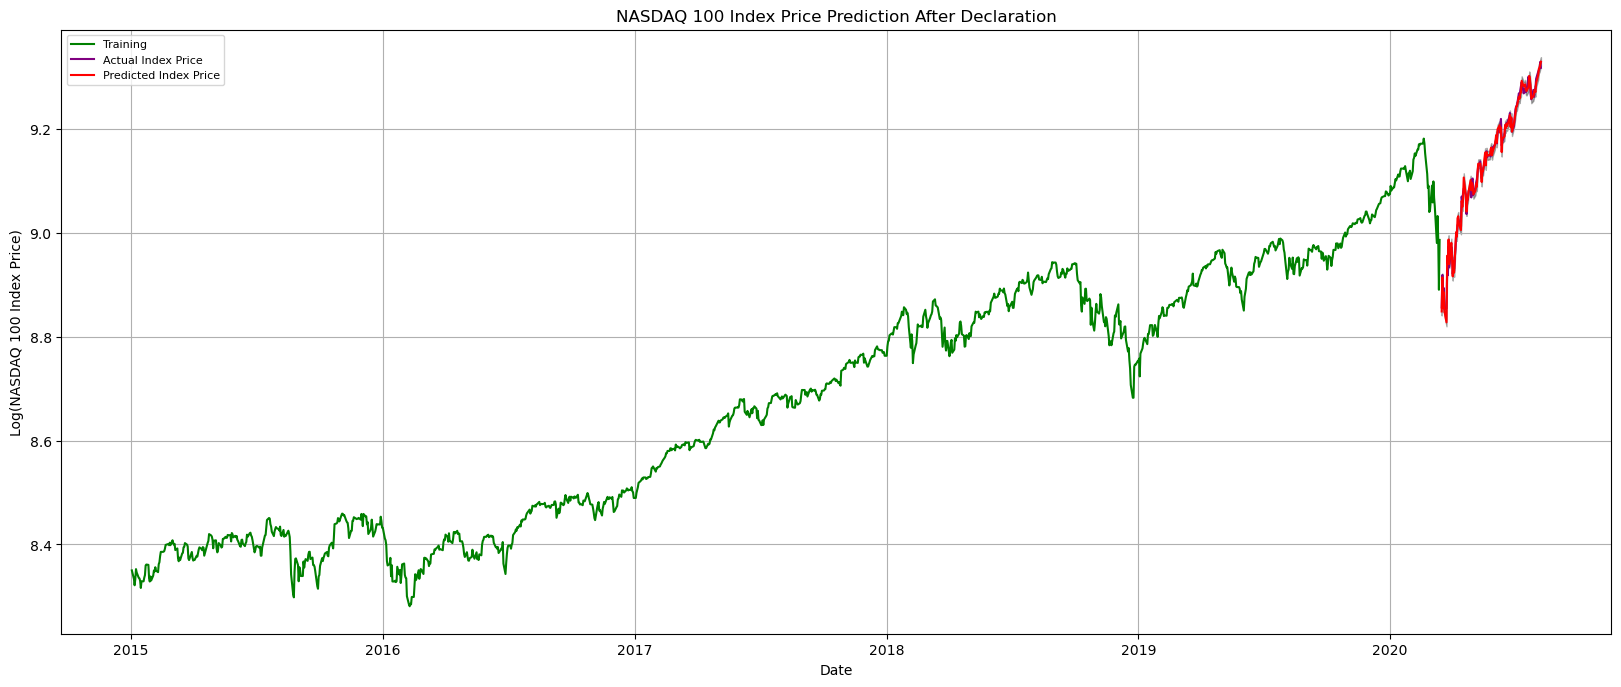

In [34]:
# make series for plotting purpose
fc_series = pd.Series(forecasts, index=test_data["NASDAQ 100"].index)
lower_series = pd.Series(conf["Lower"].tolist(), index=test_data["NASDAQ 100"].index)
upper_series = pd.Series(conf["Upper"].tolist(), index=test_data["NASDAQ 100"].index)

plt.figure(figsize=(20,8), dpi=100)
plt.grid(True)
plt.plot(train_data["NASDAQ 100"], label='Training', color='green')
plt.plot(test_data["NASDAQ 100"], color = 'purple', label='Actual Index Price')
plt.plot(fc_series, color = 'red',label='Predicted Index Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.30)
plt.title('NASDAQ 100 Index Price Prediction After Declaration')
plt.xlabel('Date')
plt.ylabel('Log(NASDAQ 100 Index Price)')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('NASDAQ 100 Pre Prediction.png')
plt.show()

In [35]:
# report performance
mse = mean_squared_error(test_data["NASDAQ 100"], fc_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data["NASDAQ 100"], fc_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data["NASDAQ 100"], fc_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data["NASDAQ 100"])/np.abs(test_data["NASDAQ 100"]))
print('MAPE: '+str(mape))

MSE: 8.877413124419252e-05
MAE: 0.007186639261394862
RMSE: 0.0094220025071209
MAPE: 0.02091574982768406


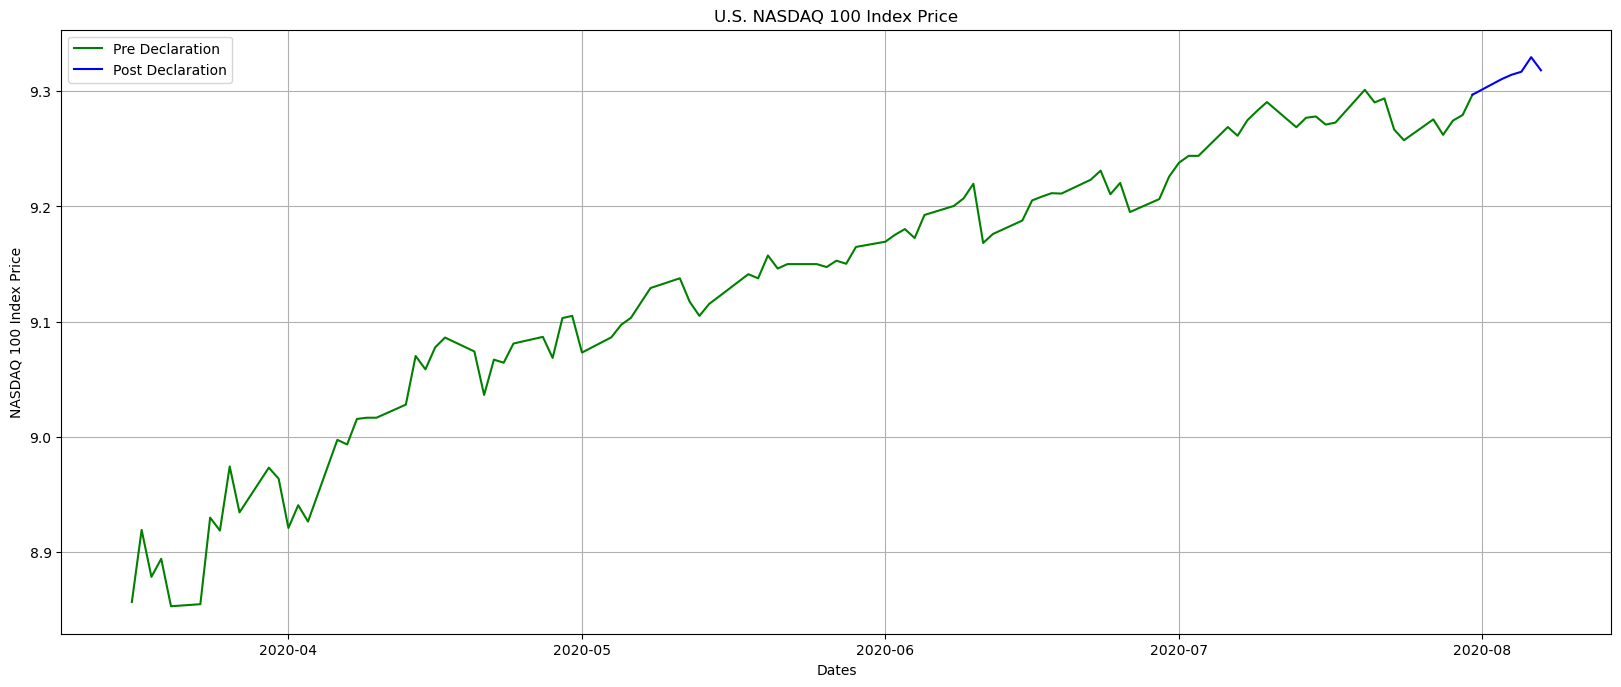

In [36]:
#split data into train and training set
train_data, test_data = df_log['2020-03-14':'2020-07-31'], df_log['2020-07-31':'2020-08-07']
# train_data.tail()
# test_data.tail()
plt.figure(figsize=(20,8), dpi=100)
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('NASDAQ 100 Index Price')
plt.title('U.S. NASDAQ 100 Index Price')
plt.plot(train_data["NASDAQ 100"], 'green', label='Pre Declaration')
plt.plot(test_data["NASDAQ 100"], 'blue', label='Post Declaration')
plt.legend()

In [37]:
auto = pm.auto_arima(train_data["NASDAQ 100"], exogenous=train_data[["S&P 500","Bloomberg Dollar Index","Yield on U.S. 10 Year Government Bond - %","Gold Price (Oz.) - USD","M2 Money Supply - USD Trillions"]], d=n_diffs, seasonal=True, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-667.893, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-668.651, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-667.975, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-668.653, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-670.271, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-666.306, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.422 seconds


In [38]:
print(auto.order)

(0, 1, 0)


In [39]:
y_test = []
y_test = test_data["NASDAQ 100"].tolist()
exogen_data = test_data[["S&P 500","Bloomberg Dollar Index","Yield on U.S. 10 Year Government Bond - %","Gold Price (Oz.) - USD","M2 Money Supply - USD Trillions"]]
exogen_data = exogen_data.values.tolist()

In [40]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step_ex(exog):
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True, exogenous=exog)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob, item in zip(y_test, exogen_data):
    fc, conf = forecast_one_step_ex([item])
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob, exogenous=[item])
    
print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 3.485854174062058e-05
SMAPE: 0.04822578089363153


In [41]:
conf = pd.DataFrame(confidence_intervals, columns=["Lower", "Upper"])

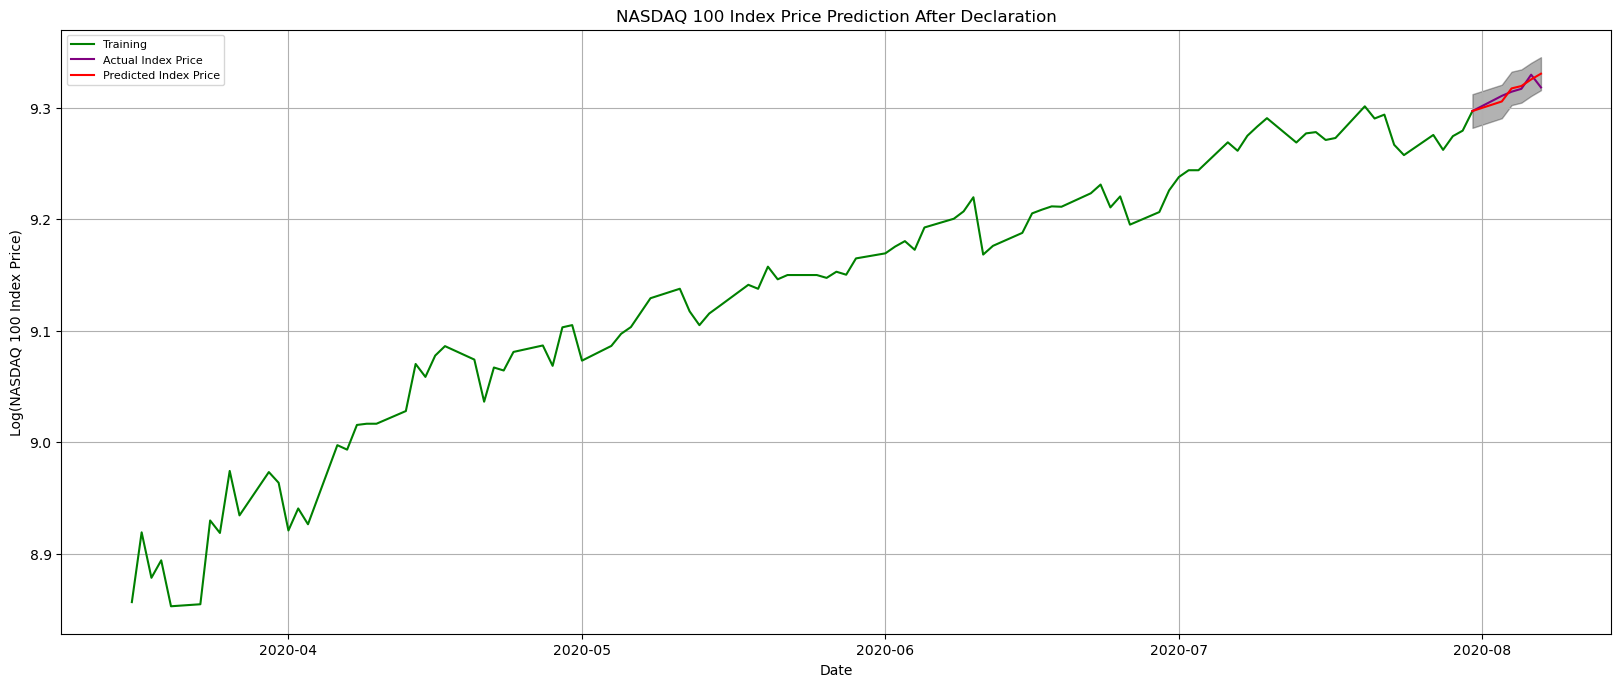

In [42]:
# make series for plotting purpose
fc_series = pd.Series(forecasts, index=test_data["NASDAQ 100"].index)
lower_series = pd.Series(conf["Lower"].tolist(), index=test_data["NASDAQ 100"].index)
upper_series = pd.Series(conf["Upper"].tolist(), index=test_data["NASDAQ 100"].index)

plt.figure(figsize=(20,8), dpi=100)
plt.grid(True)
plt.plot(train_data["NASDAQ 100"], label='Training', color='green')
plt.plot(test_data["NASDAQ 100"], color = 'purple', label='Actual Index Price')
plt.plot(fc_series, color = 'red',label='Predicted Index Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.30)
plt.title('NASDAQ 100 Index Price Prediction After Declaration')
plt.xlabel('Date')
plt.ylabel('Log(NASDAQ 100 Index Price)')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('NASDAQ 100 Post Prediction.png')
plt.show()

In [43]:
# report performance
mse = mean_squared_error(test_data["NASDAQ 100"], fc_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data["NASDAQ 100"], fc_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data["NASDAQ 100"], fc_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data["NASDAQ 100"])/np.abs(test_data["NASDAQ 100"]))
print('MAPE: '+str(mape))

MSE: 3.485854174062058e-05
MAE: 0.004494817898194429
RMSE: 0.005904112273714024
MAPE: 0.0017247295035379452
